# E-Commerce Churn

The dataset belongs to a leading online e-commerce company. An online retail (E-commerce) company wants to know which customers are about to churn, so they can approach customers to offer some offers

Inspiration, some possible insights could be -

- What variables are contributing to customer churn?
- Who are the customers more likely to churn?
- What actions can be taken to stop them from leaving?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from matplotlib.pyplot import rcParams
warnings.filterwarnings('ignore')

In [2]:
rcParams['axes.grid']         = True
rcParams['grid.alpha']        = 0.3
rcParams['axes.spines.right'] = False
rcParams['axes.spines.left']  = False
rcParams['axes.spines.top']   = False
rcParams['figure.figsize']    = (17,5)

In [3]:
pd.set_option('display.max_columns',100)
plt.rc('axes',axisbelow=True)

In [4]:
df = pd.read_excel('D:/Data/UCI/Churn/Churn_ECommerce.xlsx',sheet_name='E Comm',engine='openpyxl')
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1333,51334,0,8.0,Phone,1,6.0,Debit Card,Female,NaN,5,Mobile,1,Married,2,0,12.0,0.0,1.0,1.0,129.77
5263,55264,0,22.0,Mobile Phone,3,23.0,Debit Card,Female,4.0,4,Laptop & Accessory,3,Married,10,0,15.0,8.0,8.0,8.0,189.39
4180,54181,0,1.0,Computer,1,18.0,UPI,Female,4.0,2,Laptop & Accessory,3,Married,2,0,19.0,1.0,2.0,4.0,165.11
557,50558,0,5.0,Computer,1,NaN,Debit Card,Female,3.0,4,Mobile,4,Divorced,7,0,20.0,1.0,1.0,2.0,123.32
3003,53004,0,7.0,Computer,1,12.0,Debit Card,Female,4.0,4,Fashion,4,Divorced,8,0,12.0,3.0,NaN,9.0,243.78


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

- 20 columns with 5630 rows
- Missing values appear in some features
- Seems like all data types are already correct

**Desriptive statistics** numerical data

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


**Desriptive statistics** categorical data

In [7]:
df.select_dtypes('object').describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


# Data preparation

## Handling missing values

In [8]:
feature_na = df.isna().sum().sort_values(ascending=False).to_frame().rename({0:'Missing values'},axis=1)
feature_na = feature_na[feature_na['Missing values']!=0]
feature_na['percentage(%)'] = round(feature_na['Missing values']/df.shape[0],4)*100
feature_na['data type'] = df[feature_na.index.tolist()].dtypes.values
feature_na

,Missing values,percentage(%),data type
DaySinceLastOrder,307,5.45,float64
OrderAmountHikeFromlastYear,265,4.71,float64
Tenure,264,4.69,float64
OrderCount,258,4.58,float64
CouponUsed,256,4.55,float64
HourSpendOnApp,255,4.53,float64
WarehouseToHome,251,4.46,float64


There are **7 features** which have missing values and all the percentages are **below 6%**

Since the data type of all features are **float**, whether using **mean** or **median** for filling NaN, we will first examine the outliers of each feature

## Outliers of each feature above

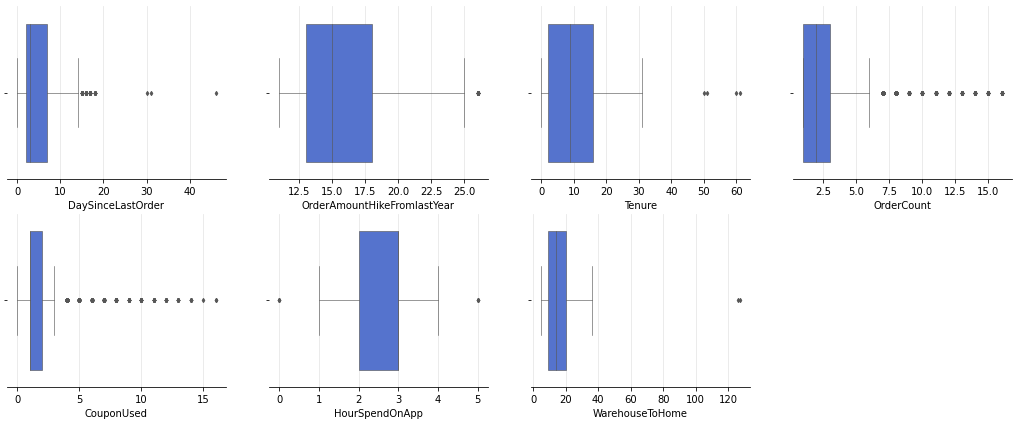

In [9]:
col_na = feature_na.index.tolist()

plt.figure(figsize=(18,7))
for i in range(len(feature_na.index)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df[col_na[i]],fliersize=3,linewidth=0.6,color='royalblue')

Lots of outliers appear in there. Thus, safer to use median for filling missing values

In [10]:
for col in df[col_na].columns:
    df.loc[df[col].isna(),col]=df[col].median()

In [11]:
df[col_na].isna().sum()

DaySinceLastOrder              0
OrderAmountHikeFromlastYear    0
Tenure                         0
OrderCount                     0
CouponUsed                     0
HourSpendOnApp                 0
WarehouseToHome                0
dtype: int64

## Duplicated data

In [12]:
df.duplicated().sum()

0

## Distribution numerical features

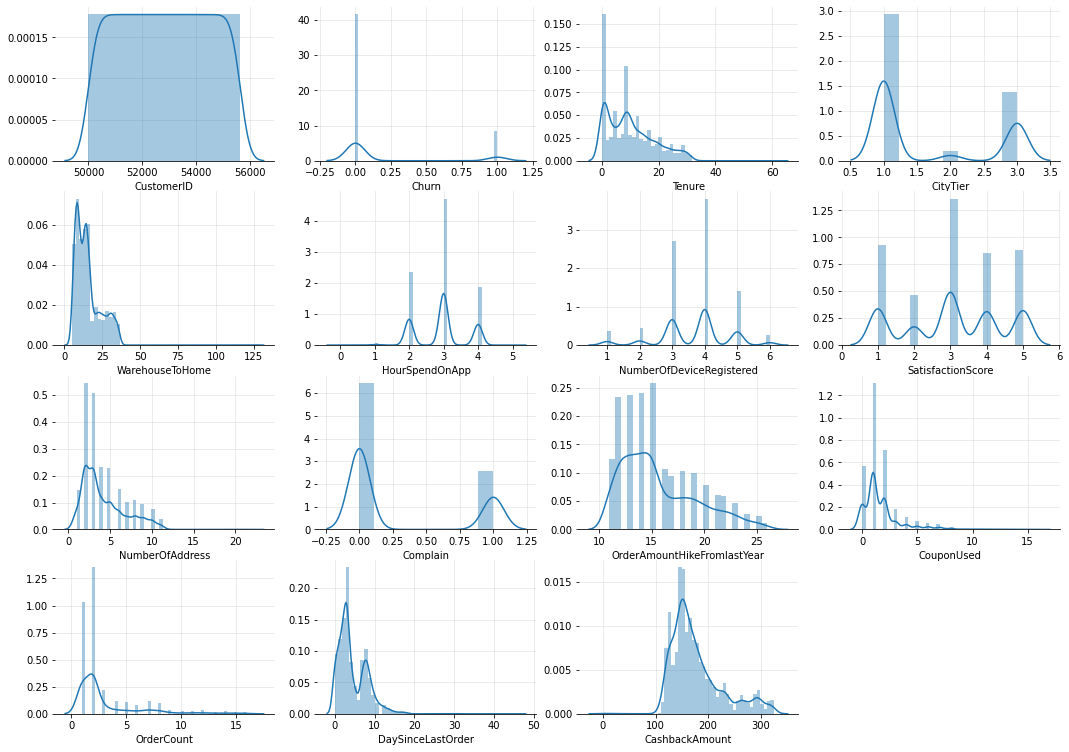

In [13]:
num_col = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(18,13))
for col in range(len(num_col)):
    plt.subplot(4,4,col+1)
    sns.distplot(df[num_col[col]])
    plt.ylabel('')

## Inconsistent data

Check whether the value has same meaning with others

In [14]:
for col1 in df.columns:
    if df[col1].nunique()<12:
        print(col1,':',df[col1].unique(),'\n')

Churn : [1 0] 

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer'] 

CityTier : [3 1 2] 

PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'] 

Gender : ['Female' 'Male'] 

HourSpendOnApp : [3. 2. 1. 0. 4. 5.] 

NumberOfDeviceRegistered : [3 4 5 2 1 6] 

PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] 

SatisfactionScore : [2 3 5 4 1] 

MaritalStatus : ['Single' 'Divorced' 'Married'] 

Complain : [1 0] 



In [15]:
df.replace({'PreferredLoginDevice':{'Phone':'Mobile Phone'},
            'PreferredPaymentMode':{'CC':'Credit Card',
                                    'Cash on Delivery':'COD'},
            'PreferedOrderCat'   :{'Mobile':'Mobile Phone'}
           },inplace=True)

## Handling outliers

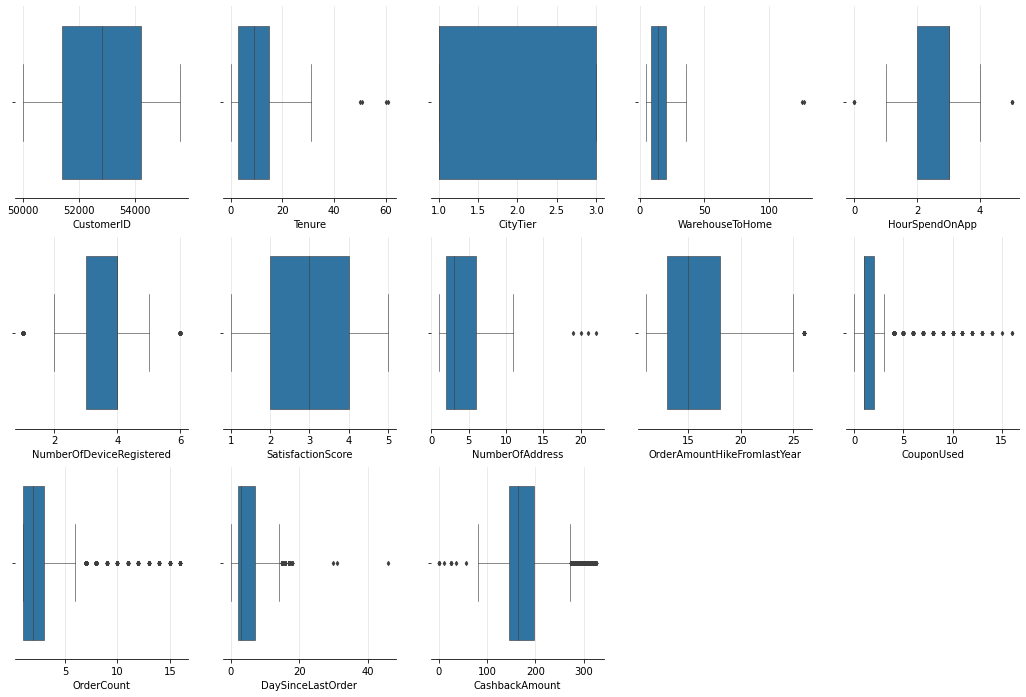

In [16]:
num_features = (df.select_dtypes('number').nunique()>2).sort_values()[2:].index.tolist()

plt.figure(figsize=(18,12))
for col in range(len(num_features)):
    plt.subplot(3,5,col+1)
    sns.boxplot(df[num_features[col]],fliersize=3,linewidth=0.6)

use z-score to reduce outliers and then remove some values manually if needed

In [17]:
z  = np.abs(stats.zscore(df[num_features]))
df_new = df[(z<3).all(axis=1)]

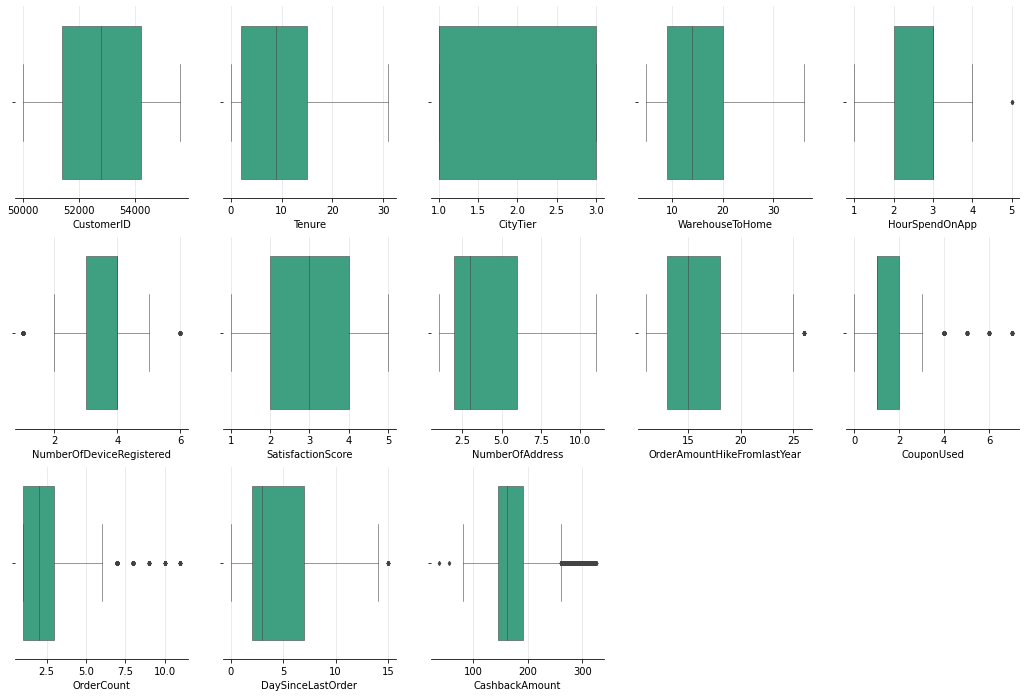

In [18]:
plt.figure(figsize=(18,12))
for col in range(len(num_features)):
    plt.subplot(3,5,col+1)
    sns.boxplot(df_new[num_features[col]],fliersize=3,linewidth=0.55,color='#2eb086')

In [19]:
print('Before remove outliers: {} '.format(df.shape[0]))
print('After remove outliers : {} '.format(df_new.shape[0]))

Before remove outliers: 5630 
After remove outliers : 5350 


After removing outliers, there are only 280 data removed. New dataset still contains 95% information, thus we can jump into the next process

# Exploratory Data Analysis

## Proportion of churn

In [20]:
churn = df_new['Churn'].value_counts().to_frame()
churn['percentage'] = round(churn['Churn']/churn['Churn'].sum()*100,2)
churn.index = ['No','Yes']

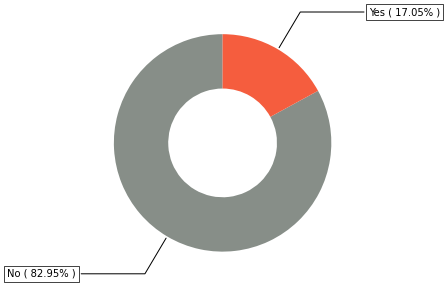

In [21]:
fig,ax = plt.subplots()
wedges, texts = ax.pie(churn.Churn,colors=['#878E88','#F55D3E'], startangle=90,wedgeprops=dict(width=0.5))
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(churn.index[i] + " ( " + str(round(churn.percentage[i], 2)) + "% )", xy=(x, y), 
                xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw)

**17.05% of customers** in this data are churned

## Deep-dive Analysis

Define function

In [22]:
def analysis_cat(feature, xaxis=0):
    count     = df_new[feature].value_counts()
    pct_count = df_new[feature].value_counts(normalize=True)
    df_count  = pd.DataFrame({feature:count.index,
                              'Count':count.values,
                              'Percentage':round(pct_count*100,2)                              
                              })
    
    
    # Calculate the percentage of customer churned per category
    cat_pct               = df_new[df_new.Churn==1][feature].value_counts().to_frame()
    cat_pct['percentage'] = round(cat_pct[feature]/df_new[feature].value_counts()*100,2)
    cat_pct               = cat_pct.reset_index().sort_values('index')
    
    
    fig, ax = plt.subplots(1,2,figsize=(17,6))
    
    sns.countplot(feature, data=df_new, ax=ax[0], hue='Churn', palette = ['lightgrey','#F55D3E'],order=cat_pct['index'])
    ax[0].set_title(feature+'\n', fontsize = 15, fontweight = 550)
    ax[0].legend(['Not churn', 'Churn'])
    # ax[0].set_yticks(df_new.groupby(['Churn',feature]).count()['Tenure'].values)
    ax[0].set_ylabel('')
    
    sns.barplot('index', 'percentage',data=cat_pct, ax=ax[1],color='#F55D3E',order=cat_pct['index'])
    ax[1].set_title('% Churn rate by '+feature+'\n', fontsize= 16, fontweight=550)
    ax[1].set_ylabel('Churn percentage')
    for x, y in zip(range(len(cat_pct['index'])), cat_pct.percentage):
        ax[1].text(x-xaxis, y+0.4, str(y)+'%', fontsize=10, color='#F55D3E', fontweight=550)
    
    ax[0].set_xlabel('')
    ax[1].set_xlabel('')
    return df_count
    
def analysis_num(feature,bins='auto'):
    sns.histplot(df_new[df_new['Churn']==1][feature], label='Churn', color='#F55D3E',kde=True, edgecolor='#F55D3E',bins=bins)
    sns.histplot(df_new[df_new['Churn']==0][feature], label='No churn', color='tab:grey', kde=True,edgecolor='lightgrey',bins=bins)
    
    plt.legend()
    plt.title(feature+' by Customer churn',fontsize=16, fontweight=550)
    plt.ylabel('')
    
    plt.rc('axes',axisbelow=True)
    plt.grid(False)
    plt.grid(axis='y',alpha=0.3)
    plt.show()

### Categorical

Features:
- **Device customer** ( nominal )             
- **City level** ( ordinal )
- **Payment mode** ( nominal )
- **Gender** ( nominal )
- **Item category** ( nominal )
- **Satisfaction score** ( ordinal )
- **Marital status** ( nominal )
- **Complain** ( nominal )

#### Device customer

Mobile phone and computer

,PreferredLoginDevice,Count,Percentage
Mobile Phone,Mobile Phone,3803,71.08
Computer,Computer,1547,28.92


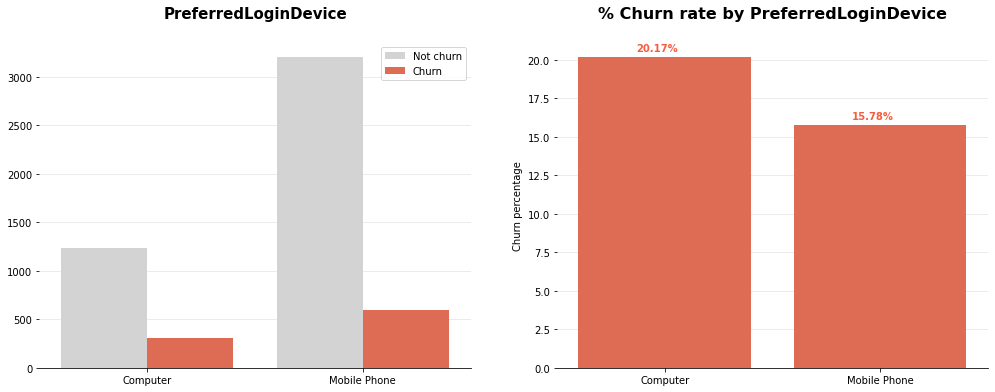

In [23]:
analysis_cat('PreferredLoginDevice', 0.13)

The graph on the right shows us a number of customer churn per total customer each feature category 

- Mostly, the customer uses **Mobile Phone** for making transactions *( 71% of data )*
- Even though Mobile Phone is the most, customers who use **Computer** are more likely to **churn**

#### City level

,CityTier,Count,Percentage
1,1,3485,65.14
3,3,1627,30.41
2,2,238,4.45


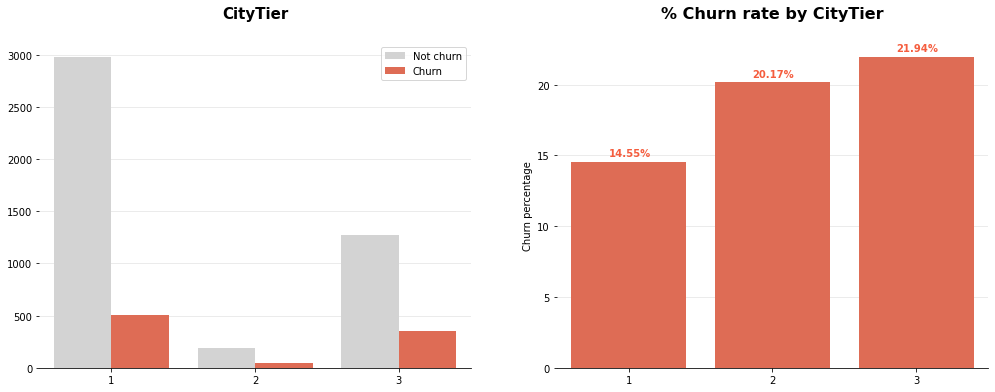

In [24]:
analysis_cat('CityTier',0.14)

Same like  *PreferredLoginDevice*, even though **City tier 1** is the most of not churned customers, the percentage tend to be churn is **less** than the others

#### Payment Mode

,PreferredPaymentMode,Count,Percentage
Debit Card,Debit Card,2195,41.03
Credit Card,Credit Card,1686,31.51
E wallet,E wallet,579,10.82
COD,COD,489,9.14
UPI,UPI,401,7.50


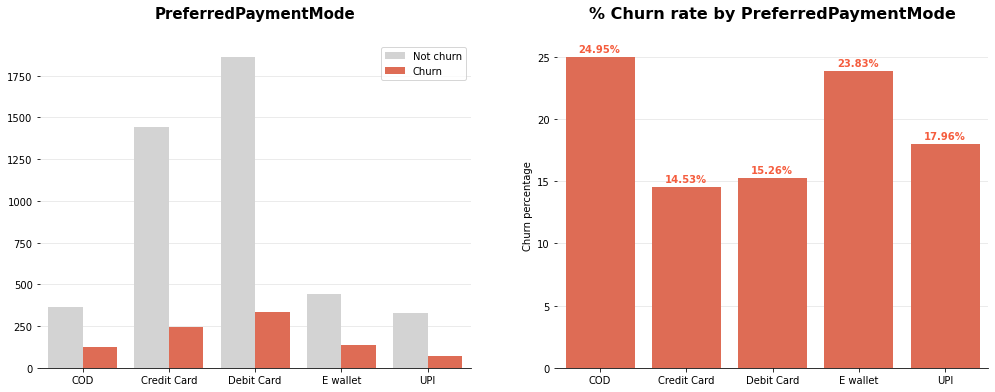

In [25]:
analysis_cat('PreferredPaymentMode',0.25)

- **Debit card** is the most payment method used by customers
- **COD and **E-wallet** users are more likely to be ***churn*** than others even though the number of ***not churn*** customers is much less than Debit cards, while **Credit** and **Debit Cards** are the opposite

#### Gender

,Gender,Count,Percentage
Male,Male,3214,60.07
Female,Female,2136,39.93


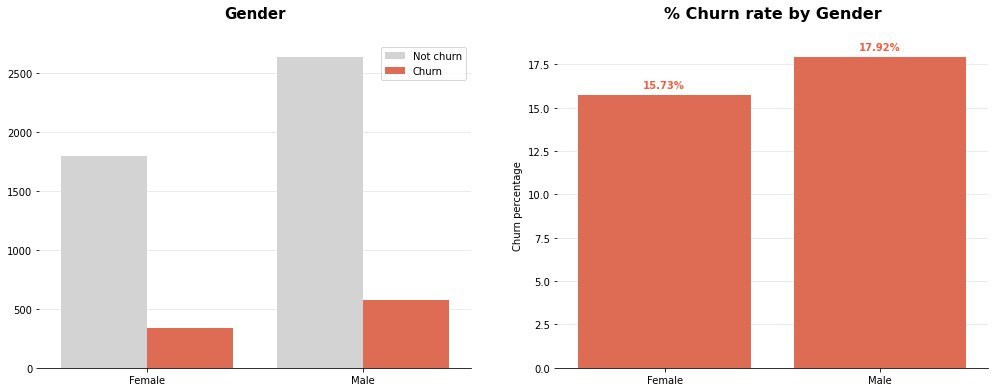

In [26]:
analysis_cat('Gender',0.1)

**Male customer** has a higher chance to be churn than **female**. Nevertheless, the difference of churn probability between those two isn't huge even though the number of male customers is 60% of data

#### Item category

,PreferedOrderCat,Count,Percentage
Mobile Phone,Mobile Phone,2053,38.37
Laptop & Accessory,Laptop & Accessory,2000,37.38
Fashion,Fashion,752,14.06
Grocery,Grocery,332,6.21
Others,Others,213,3.98


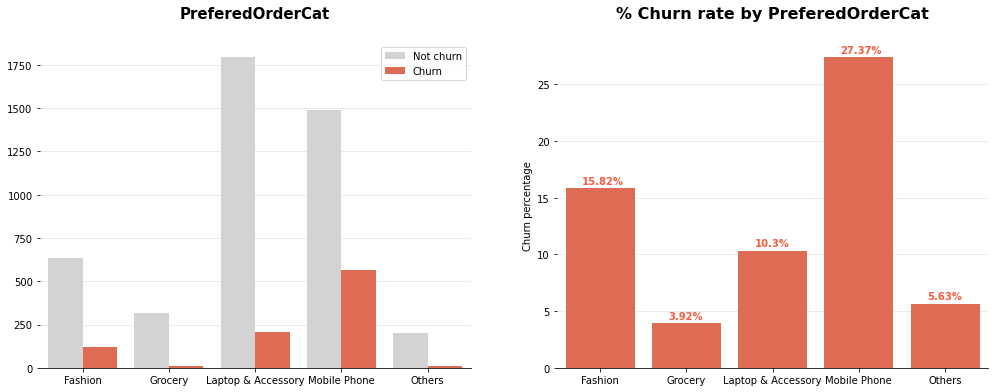

In [27]:
analysis_cat('PreferedOrderCat',0.21)

- **Mobile phone** and **Laptop/accessory** categories are the items **most purchased** by customers *( in total, about 80% )*, but those who bought **mobile phone** have a much **higher chance of churn** than they who bought **laptop/accessory**
- People who often buy **groceries** and **others** have a small chance of churn relative to others. Customers from these two categories amount to 10% of a whole data

#### Satisfaction

,SatisfactionScore,Count,Percentage
3,3,1620,30.28
1,1,1118,20.90
5,5,1034,19.33
4,4,1024,19.14
2,2,554,10.36


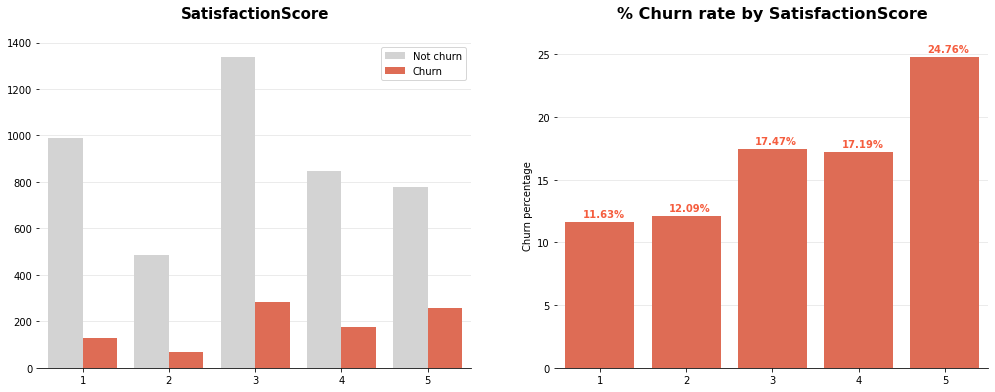

In [28]:
analysis_cat('SatisfactionScore',0.2)

There is an interesting insight from the graph above; Although customers are satistied (*represented by a score of "5"*), they tend to churn more easily. The chance is even 2x higher than a score of "1"

#### Marital status

,MaritalStatus,Count,Percentage
Married,Married,2825,52.80
Single,Single,1722,32.19
Divorced,Divorced,803,15.01


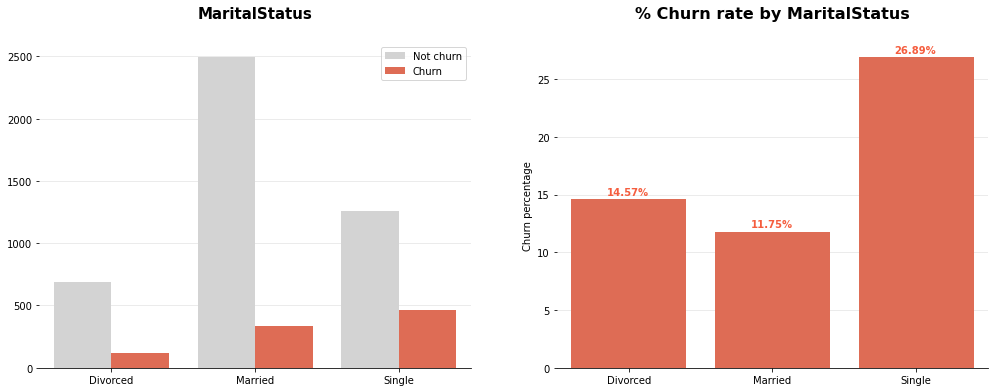

In [29]:
analysis_cat('MaritalStatus',0.15)

- More than a half of data is **married** people. Also they have the smallest chance of churn
- The number of **"single"** customers is about 32% of a whole data and they are more likely to churn, more than 2x **Married's** 

#### Complain
- Complain itself
- Complain by item category 
- Complain by gender

,Complain,Count,Percentage
0,0,3818,71.36
1,1,1532,28.64


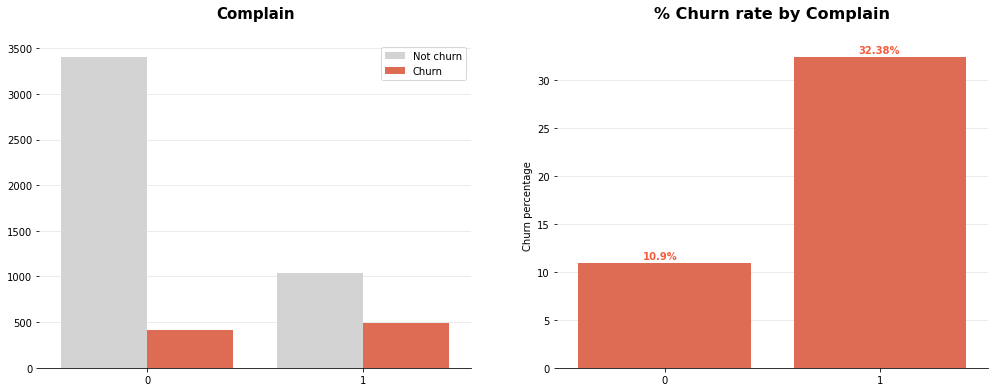

In [30]:
analysis_cat('Complain',0.1)

**It does make sense. The more complains, the more customers churn**

Number of **"no complain"** customers is about 72% and their chance of churn is just **10.9%**

##### Complain by item category and gender
What is category which has lots of complaints?

In [74]:
com_cat_gen = df_new.groupby(['PreferedOrderCat','Complain','Gender']).count()['Tenure'].to_frame().reset_index()
com_cat_gen = com_cat_gen[com_cat_gen['Complain']==1]
com_cat_gen.columns = ['Category','Complain','Gender','Counts']
com_cat_gen['percentage'] = round(com_cat_gen.Counts/com_cat_gen.Counts.sum()*100,2)

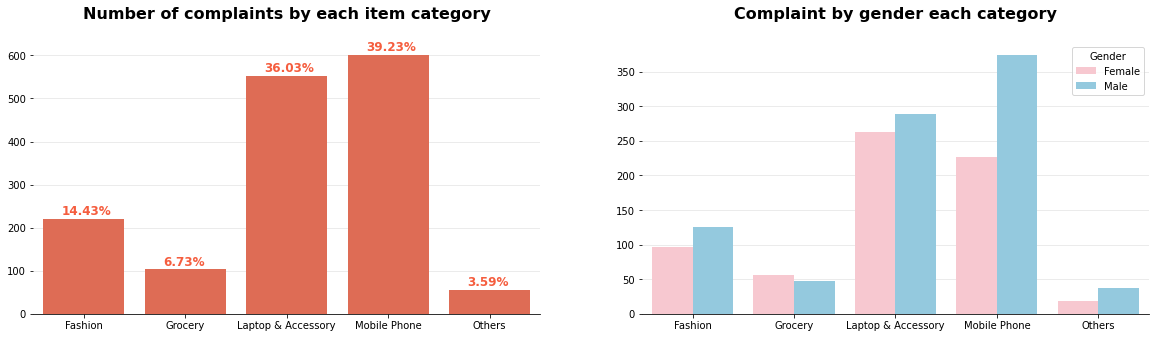

In [86]:
com_yes = com_cat_gen.groupby('Category').sum().reset_index()

fig, ax = plt.subplots(1,2, figsize=(20,5))

sns.barplot('Category','Counts',data=com_yes, color ='#F55D3E',ax=ax[0])
ax[0].set_title('Number of complaints by each item category\n', size=16, fontweight=550)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot('Category','Counts',data=com_cat_gen, hue='Gender', palette=['pink','skyblue'])
ax[1].set_title('Complaint by gender each category\n',size=16, fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')


for x, y, z in zip(range(len(com_yes.Category)),com_yes.Counts, round(com_yes.percentage,2)):
    ax[0].text(x-0.22, y+10, str(z)+'%',fontsize=12, color='#f55d3e',fontweight='semibold')

plt.show()

**Mobile phone** and **Laptop/Accessory** have lots of complaints *( in total, about 75% )*. There are a lot of factors why the most complaints are in both categories. It might caused by inappropiate courier while in delivery. But still, this assumption has to be proved by asking to the team in charge what types of complainst by customers
- **Only groceries** where a number of complaints in Male are less than Female. It does make sense since females often take care of the kitchen stuff including groceries. For the rest, Male is the most. 
- In **Laptop/Accessory**, Male and Female have a small difference in number

In [88]:
df_new.head(2)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90


#### Number of Device Registered

,NumberOfDeviceRegistered,Count,Percentage
4,4,2245,41.96
3,3,1634,30.54
5,5,824,15.40
2,2,268,5.01
1,1,230,4.30
6,6,149,2.79


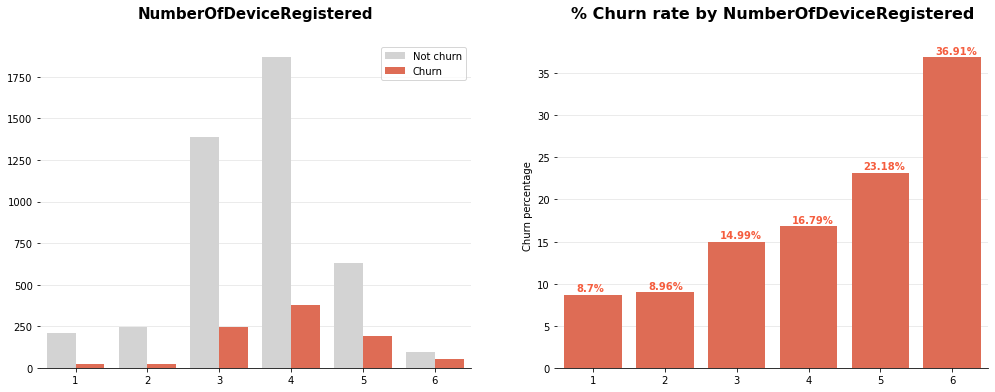

In [35]:
analysis_cat('NumberOfDeviceRegistered',0.235)

It seems that there is a pattern over there. The more devices registered, the higher the chance of churn
- Mostly, **three** and **four** devices were registered by customers *( in total, about 72% of a whole data )*
- **One** and **two** have similar both in churn probability and number of customers

In [36]:
df_new

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
